In [59]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
## Reading csv and excel files into dataframes
tm837 = pd.read_csv('../data/race_data/TelemetryData_8377650301140219417.csv', low_memory =False)
tm145 = pd.read_csv('../data/race_data/TelemetryData_14577742557187250604.csv', low_memory=False)
sd145 = pd.read_csv('../data/race_data/SessionData_14577742557187250604.csv', low_memory=False)
sd837 = pd.read_csv('../data/race_data/SessionData_8377650301140219417.csv', low_memory=False)
sd102 = pd.read_csv('../data/race_data/SessionData_10230136787177318441.csv', low_memory=False)
sd108 = pd.read_csv('../data/race_data/SessionData_1087987310493855854.csv', low_memory=False)
sd117 = pd.read_csv('../data/race_data/SessionData_11752605864096667831.csv', low_memory=False)
pilot1_102 = pd.read_excel('../data/excel_files/driver_1_tm102.xlsx')
pilot1_108 = pd.read_excel('../data/excel_files/driver_1_tm108.xlsx')
pilot1_117 = pd.read_excel('../data/excel_files/driver_1_tm117.xlsx')

##### I pushed all .csv files from the dataset onto a postgres database for manipulation using src/csv_to_db.py
##### Datasets filtered by pilot were created using sql_queries/* and src/convert_sqls.py

In [78]:
tm145.columns

Index(['sessionTime', 'frameIdentifier', 'pilot_index', 'worldPositionX',
       'worldPositionY', 'worldPositionZ', 'worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'worldForwardDirX', 'worldForwardDirY',
       'worldForwardDirZ', 'worldRightDirX', 'worldRightDirY',
       'worldRightDirZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'drs', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelMix', 'pitLimiterStatus',
       'fuelInTank', 'fuelRemainingLaps', 'tyresWear', 'actualTyreCompound',
       'tyresDamage', 'ersStoreEnergy', 'ersDeployMode',
       'ersHarvestedThisLapMGUK', 'ersHarvestedThisLapMGUH',
       'ersDeployedThisLap', 'carPosition', 'currentLapTime', 'currentLapNum',
       'lapDistance', 'totalDistance', 'pitStatus', 'sector', 'driverStatus',

In [79]:
## Grabbing columns that I want in .corr()

tm145_1 = tm145[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']]#corr(numeric_only=True)

tm145_1.corr(numeric_only=True)

,worldVelocityX,worldVelocityY,worldVelocityZ,gForceLateral,gForceLongitudinal,gForceVertical,yaw,pitch,roll,speed,...,brake,clutch,gear,engineRPM,engineTemperature,fuelInTank,fuelRemainingLaps,carPosition,currentLapNum,totalDistance
worldVelocityX,1.000000,-0.172524,0.382080,0.208356,-0.061706,0.040248,0.654535,-0.250945,0.084209,0.163673,...,-0.032524,0.000149,0.176504,-0.041677,-0.003377,-0.009915,-0.012182,0.002997,-0.006045,0.009420
worldVelocityY,-0.172524,1.000000,-0.375999,0.087968,-0.000096,-0.018910,0.121716,0.002066,-0.034604,-0.254580,...,0.055408,-0.000296,-0.258171,-0.121094,-0.001666,-0.010714,0.004859,0.019007,0.017472,0.011863
worldVelocityZ,0.382080,-0.375999,1.000000,0.042038,0.039829,0.022490,0.049088,0.083097,-0.028481,0.085053,...,-0.080137,0.000060,0.081020,-0.010368,0.001828,-0.005172,-0.008598,0.004743,-0.008506,0.004687
gForceLateral,0.208356,0.087968,0.042038,1.000000,0.009881,0.025131,0.095691,0.025854,0.569855,0.071320,...,0.026707,0.002944,0.059390,0.086348,-0.005347,-0.001976,-0.003575,0.009736,-0.002517,0.001775
gForceLongitudinal,-0.061706,-0.000096,0.039829,0.009881,1.000000,-0.029056,-0.050449,0.017643,-0.021853,0.006499,...,-0.910424,-0.000026,0.000863,0.071839,-0.000300,0.003244,0.002887,0.002152,-0.004343,-0.003189
gForceVertical,0.040248,-0.018910,0.022490,0.025131,-0.029056,1.000000,0.009251,-0.020763,-0.025104,0.007956,...,0.027201,0.000464,0.004264,-0.001265,0.001739,0.000555,0.000313,0.000541,-0.001230,-0.000548
yaw,0.654535,0.121716,0.049088,0.095691,-0.050449,0.009251,1.000000,-0.165077,0.055014,0.102842,...,-0.006227,0.002270,0.111397,-0.004814,-0.002919,0.002258,-0.003467,-0.011360,-0.009715,-0.002717
pitch,-0.250945,0.002066,0.083097,0.025854,0.017643,-0.020763,-0.165077,1.000000,0.170621,-0.192773,...,-0.022358,-0.002611,-0.203715,-0.091637,-0.001341,0.004144,0.003470,-0.004469,0.001530,-0.004082
roll,0.084209,-0.034604,-0.028481,0.569855,-0.021853,-0.025104,0.055014,0.170621,1.000000,-0.264273,...,0.011752,-0.001580,-0.264813,-0.192895,0.003923,-0.009982,-0.001031,0.005701,0.007835,0.010526
speed,0.163673,-0.254580,0.085053,0.071320,0.006499,0.007956,0.102842,-0.192773,-0.264273,1.000000,...,-0.014805,-0.035887,0.984664,0.639409,0.020340,-0.014333,-0.024868,-0.061554,0.006656,0.012993


<Axes: >

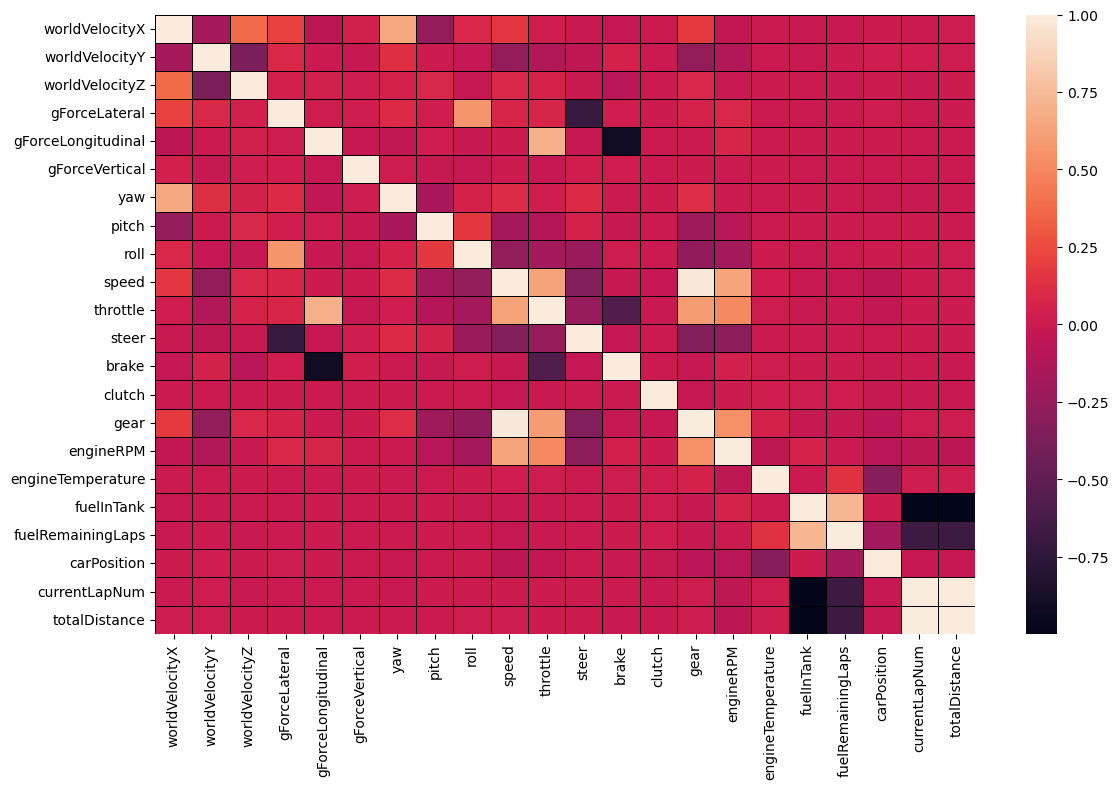

In [80]:
## Now for the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')

In [81]:
# Strong negative corr between brake and gforcelong, steer and  gforcelat, currentLapNum and fuelinTank
# Strong positive corr between gear and speed

In [82]:
tm145

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,Pressuretire3,Pressuretire4,Temptire1,Temptire2,Temptire3,Temptire4,TempBrake1,TempBrake2,TempBrake3,TempBrake4
0,0.01045,0,0,338.27011,87.64803,982.12366,0.00148,0.00128,-0.00079,6810,...,23.000,23.00,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
1,0.01045,0,1,368.84494,87.64617,1097.98560,0.00164,0.00143,0.00049,6816,...,23.000,23.00,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
2,0.01045,0,2,365.50424,87.63545,1082.33362,-0.00027,-0.00252,0.00010,6810,...,23.000,23.00,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
3,0.01045,0,3,348.30042,87.63963,1029.06458,-0.00207,0.00295,-0.00003,6803,...,23.000,23.00,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
4,0.01045,0,4,358.24823,87.64635,1075.70874,0.00224,-0.00194,0.00072,6818,...,23.000,23.00,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046815,2757.86548,58271,15,-42.72875,88.79483,875.45013,-7.24263,0.75570,-36.37080,-6498,...,23.000,23.00,90.0,88.0,91.0,89.0,987.0,988.0,1007.0,1010.0
1046816,2757.86548,58271,16,427.77100,87.67443,1438.59851,1.12654,0.03713,18.98629,3059,...,23.000,23.00,87.0,86.0,89.0,88.0,914.0,913.0,906.0,906.0
1046817,2757.86548,58271,17,371.60034,87.63984,1319.71448,-7.61521,0.03265,54.83246,-4513,...,23.000,23.00,87.0,86.0,89.0,87.0,836.0,835.0,856.0,856.0
1046818,2757.86548,58271,18,-112.58393,89.90612,834.86865,-37.69330,0.11621,-8.62519,-31952,...,23.000,23.00,89.0,87.0,91.0,88.0,909.0,911.0,892.0,895.0


In [83]:
#Lets see how these corrs look with our single driver
pilot_filter = tm145.pilot_index == 10
tm_145_pilot1 = tm145[pilot_filter]
tm_145_pilot1

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,Pressuretire3,Pressuretire4,Temptire1,Temptire2,Temptire3,Temptire4,TempBrake1,TempBrake2,TempBrake3,TempBrake4
10,0.01045,0,10,372.18503,87.63564,1113.62769,0.00226,-0.00218,0.00072,6817,...,23.0,23.0,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
30,0.02127,1,10,372.18503,87.63564,1113.62769,0.00175,-0.00014,0.00057,6817,...,23.0,23.0,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
50,0.08427,2,10,372.18503,87.63564,1113.62769,0.00174,-0.00012,0.00054,6818,...,23.0,23.0,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
70,0.12629,3,10,372.18503,87.63564,1113.62769,0.00173,-0.00010,0.00055,6819,...,23.0,23.0,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
90,0.17861,4,10,372.18503,87.63564,1113.62769,0.00228,-0.00213,0.00072,6819,...,23.0,23.0,84.0,84.0,89.0,89.0,28.0,28.0,28.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046730,2757.65698,58267,10,-183.96194,90.08389,410.08896,9.69604,-0.00020,-78.42360,4129,...,23.0,23.0,91.0,88.0,91.0,88.0,564.0,565.0,431.0,432.0
1046750,2757.70703,58268,10,-183.46979,90.08381,406.18628,10.08084,-0.00026,-78.46291,4287,...,23.0,23.0,91.0,88.0,91.0,88.0,562.0,563.0,428.0,430.0
1046770,2757.76587,58269,10,-182.86208,90.08372,401.55984,10.52701,-0.00021,-78.50688,4468,...,23.0,23.0,91.0,88.0,91.0,88.0,559.0,560.0,425.0,426.0
1046790,2757.81543,58270,10,-182.33257,90.08367,397.67838,10.88867,0.00003,-78.54243,4609,...,23.0,23.0,91.0,88.0,91.0,88.0,557.0,558.0,422.0,424.0


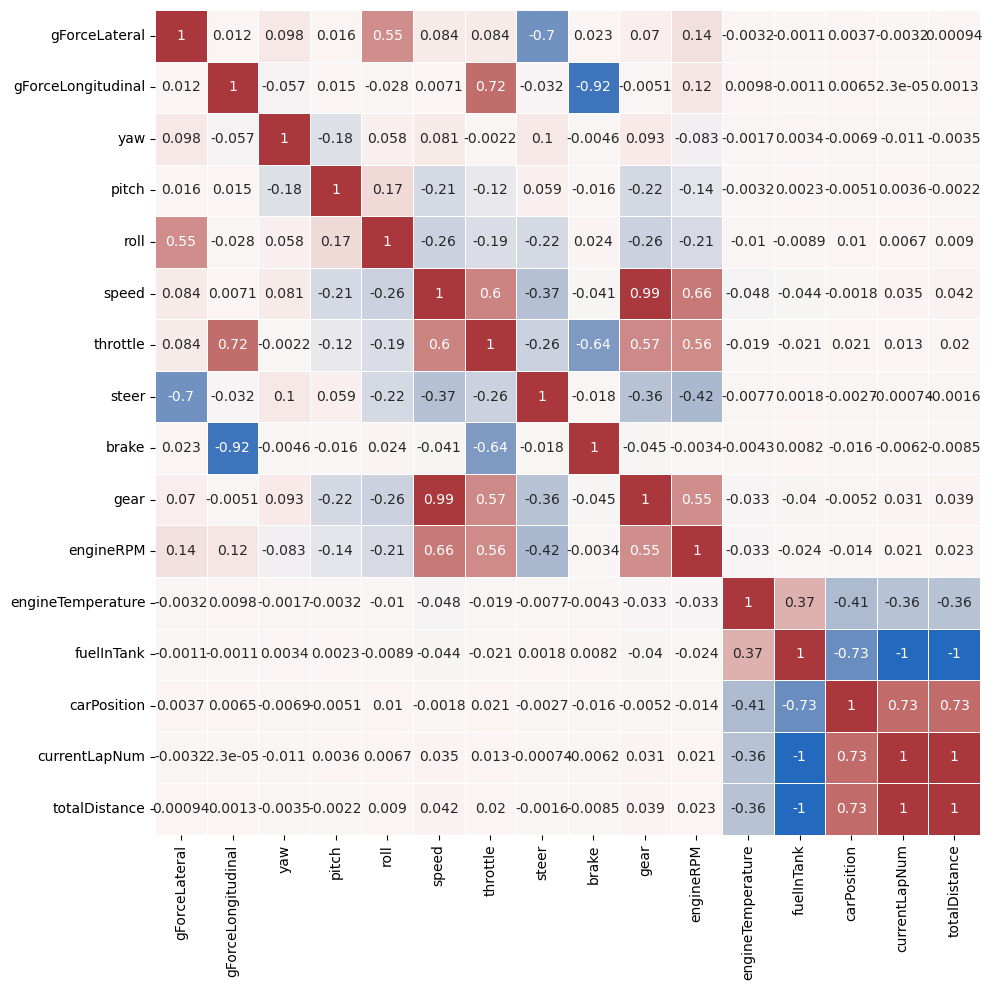

In [84]:
## I'm using the code below to cycle between pilots to compare heatmaps

'''fig, (ax1, ax2) = plt.subplots(1,2)
ax1 = sns.heatmap(tm_145_pilot1[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True),linewidth=.5,linecolor='black')
ax2 = sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')'''

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots()
fig.subplots_adjust(wspace=0.01)

sns.heatmap(tm_145_pilot1[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True), cmap="vlag", ax=ax, cbar=False, annot=True, linewidths=.5)
#sns.heatmap(tm145_1.corr(numeric_only=True), cmap="plasma", ax=ax2, cbar=False, linewidths=.5)


plt.show()

In [86]:
## Groupby pilot IDs using mean of numeric values to identify pilots that have outlying tm readings

pilot_avgs = tm145[['pilot_index','gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)
pilot_avgs

,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,throttle,steer,brake,gear,engineRPM,engineTemperature,fuelInTank,carPosition,currentLapNum,totalDistance
pilot_index,,,,,,,,,,,,,,,,
0,-0.267527,0.006264,-0.101856,0.001685,0.000729,199.467528,0.652229,0.049055,0.096435,4.850565,10477.571565,89.046411,28.433321,17.799201,17.375041,73629.497182
1,-0.283174,0.009003,-0.100488,0.001703,0.000718,202.627988,0.666719,0.051151,0.096081,4.954602,10484.934616,89.046411,28.337134,3.192144,17.830458,75604.817799
2,-0.280279,0.003310,-0.093769,0.001712,0.000769,202.756253,0.674167,0.050660,0.094688,4.965951,10482.108547,89.046411,28.607268,4.460557,17.805735,75495.144900
3,-0.274670,0.007666,-0.101991,0.001711,0.000720,200.971932,0.661864,0.050355,0.093574,4.897377,10492.838298,89.046411,29.168810,10.561797,17.595174,74596.275601
4,-0.278097,0.003201,-0.099311,0.001703,0.000726,202.514435,0.653437,0.049799,0.097592,4.937195,10501.018457,89.046411,28.356873,6.256090,17.698114,75047.029595
5,-0.277429,0.006347,-0.105968,0.001700,0.000704,202.565623,0.660886,0.049412,0.095976,4.945794,10491.753005,89.046411,27.965719,7.253644,17.674404,74947.726138
6,-0.226344,0.004036,-0.403313,0.001139,0.001534,160.387374,0.520228,0.039039,0.079908,3.925578,8356.197604,89.088179,30.674721,11.442922,16.935882,72094.103841
7,-0.274060,0.008946,-0.108184,0.001708,0.000736,201.930890,0.664854,0.048705,0.094416,4.929667,10493.327684,89.046411,30.262171,8.052406,17.658241,74874.401178
8,-0.269617,0.003470,-0.099836,0.001704,0.000674,199.810994,0.640769,0.049089,0.095965,4.858685,10484.250320,89.046411,28.949500,18.786019,17.363195,73585.698036


In [90]:
# I want to see the average per frame (frames count  up as measurements are made)
frame_avgs = tm145[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].groupby(['currentLapNum']).min(numeric_only=True)
frame_avgs

,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,throttle,steer,brake,gear,engineRPM,engineTemperature,fuelInTank,carPosition,totalDistance
currentLapNum,,,,,,,,,,,,,,,
1,-3.83333,-4.92010,-3.14149,-0.04243,-0.05384,0.0,0.0,-0.70359,0.0,0.0,3481.0,84.0,52.82994,1,-169.77539
2,-3.79056,-5.01767,-3.14144,-0.03915,-0.05244,51.0,0.0,-0.54389,0.0,1.0,4788.0,89.0,51.38374,1,4371.55762
3,-3.75738,-5.13326,-3.14158,-0.04173,-0.05309,51.0,0.0,-0.55145,0.0,1.0,4318.0,89.0,49.93151,1,8743.16309
4,-3.65189,-5.22219,-3.14140,-0.03898,-0.05339,46.0,0.0,-0.82873,0.0,1.0,5997.0,89.0,48.05654,1,13114.47070
5,-3.65308,-4.89330,-3.14152,-0.04507,-0.06580,51.0,0.0,-0.64042,0.0,1.0,5637.0,89.0,46.57332,1,17486.03125
6,-3.58425,-4.98945,-3.14156,-0.03831,-0.05138,50.0,0.0,-0.64181,0.0,1.0,6293.0,89.0,45.10857,1,21857.24609
7,-3.64931,-5.29720,-3.14159,-0.03877,-0.05362,0.0,0.0,-1.00000,0.0,1.0,4267.0,89.0,43.50948,1,26228.68359
8,-3.58646,-5.22604,-3.14151,-0.03946,-0.05380,50.0,0.0,-0.64222,0.0,1.0,6124.0,89.0,41.71134,1,30600.13672
9,-3.92859,-5.33589,-3.14156,-0.04491,-0.06721,0.0,0.0,-1.00000,0.0,1.0,3480.0,89.0,40.16127,1,34971.58203


In [ ]:
## There are a couple columns in our tm dataset that are strings containing multiple values.  
## They are split into separate columns and converted to a numeric that can be investigated using .corr with the code below.

tm145[['Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4']] = tm145['tyresPressure'].str.split('/', expand=True)
tm145[['Temptire1', 'Temptire2',  'Temptire3', 'Temptire4']] = tm145['tyresInnerTemperature'].str.split('/', expand=True)
tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm145['brakesTemperature'].str.split('/', expand=True)
tm145.Pressuretire1 = pd.to_numeric(tm145.Pressuretire1)
tm145.Pressuretire2 = pd.to_numeric(tm145.Pressuretire2)
tm145.Pressuretire3 = pd.to_numeric(tm145.Pressuretire3)
tm145.Pressuretire4 = pd.to_numeric(tm145.Pressuretire4)
tm145.Temptire1 = pd.to_numeric(tm145.Temptire1)
tm145.Temptire2 = pd.to_numeric(tm145.Temptire2)
tm145.Temptire3 = pd.to_numeric(tm145.Temptire3)
tm145.Temptire4 = pd.to_numeric(tm145.Temptire4)
tm145.TempBrake1 = pd.to_numeric(tm145.TempBrake1)
tm145.TempBrake2 = pd.to_numeric(tm145.TempBrake2)
tm145.TempBrake3 = pd.to_numeric(tm145.TempBrake3)
tm145.TempBrake4 = pd.to_numeric(tm145.TempBrake4)

<Axes: >

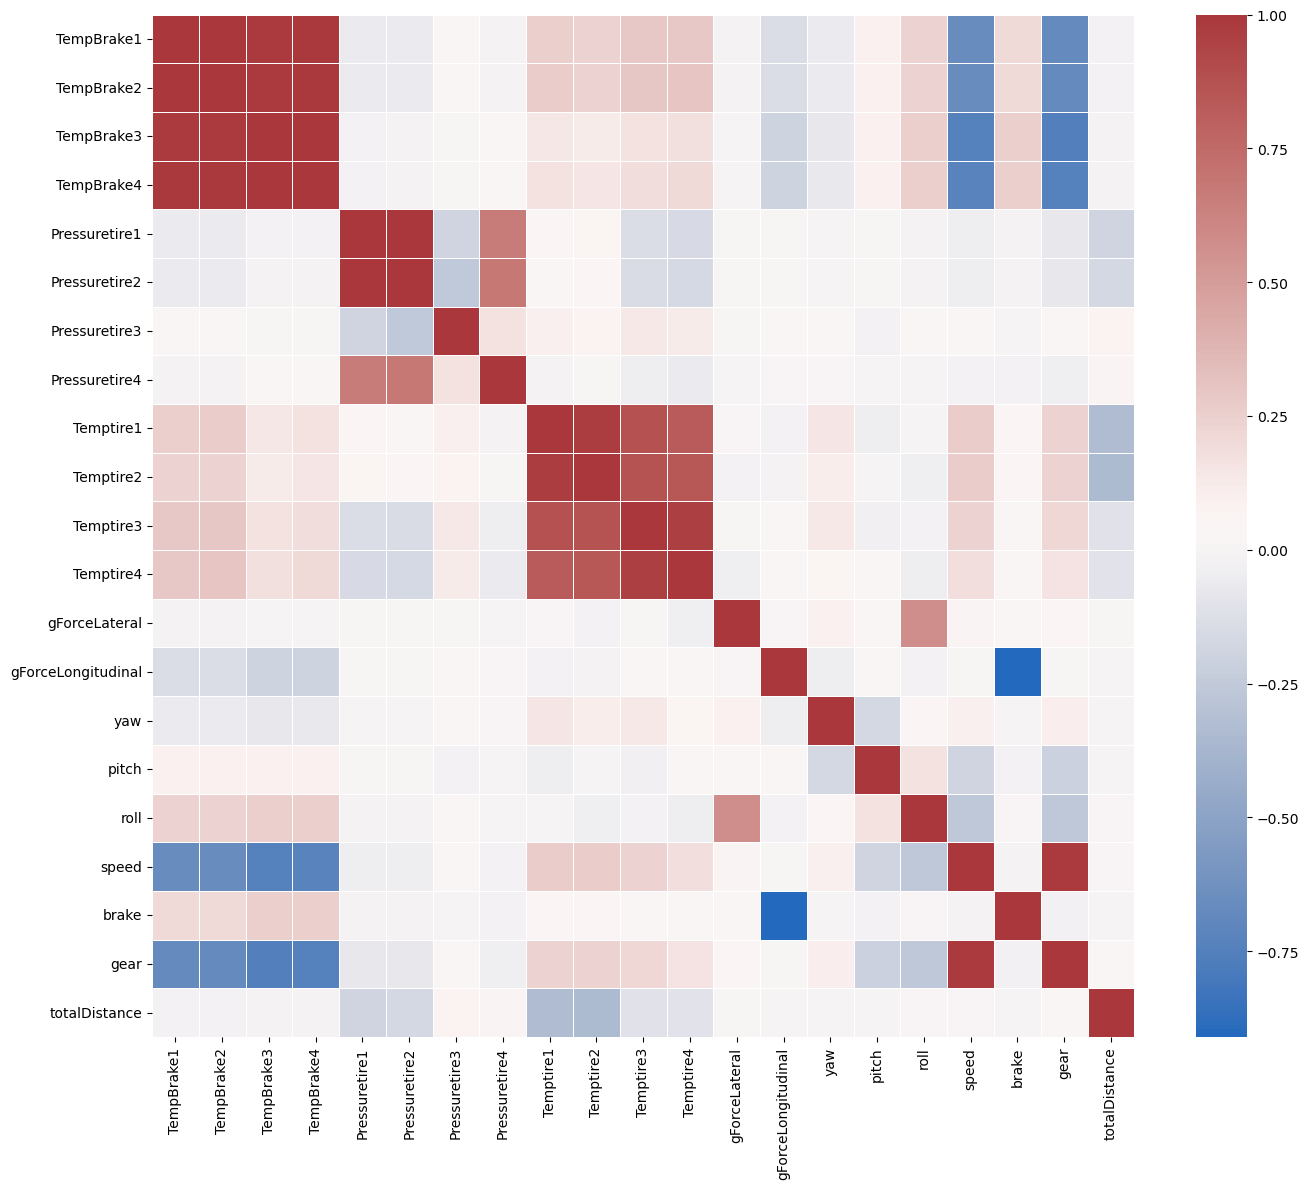

In [ ]:
## new columns heatmap with other potentially correlated columns

fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(tm145[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].corr(), cmap="vlag",linewidths=.5)

In [ ]:
## The above yielded interesting results.  Reverse correlation between speed and brake temp was expected, as well as the positive correlation between speed and tire temp.
## The one outlyer in tire temp was suprising conidering this dataframe takes data from all  cars into account.  Is there a a car with a huge tire disparity? Investigation is below.

tm145[['pilot_index','TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)

,TempBrake1,TempBrake2,TempBrake3,TempBrake4,Pressuretire1,Pressuretire2,Pressuretire3,Pressuretire4,Temptire1,Temptire2,...,Temptire4,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,brake,gear,totalDistance
pilot_index,,,,,,,,,,,,,,,,,,,,,
0,778.955271,778.717905,724.299788,723.766800,21.118564,21.118564,23.000000,23.000000,89.416913,87.847909,...,88.048570,-0.267527,0.006264,-0.101856,0.001685,0.000729,199.467528,0.096435,4.850565,73629.497182
1,776.576151,776.294438,722.459923,721.894759,21.118564,21.118564,23.000000,23.000000,90.700613,89.189407,...,89.543822,-0.283174,0.009003,-0.100488,0.001703,0.000718,202.627988,0.096081,4.954602,75604.817799
2,769.415041,769.077058,715.634962,714.977492,21.118564,21.118564,23.000000,23.000000,89.935094,88.517263,...,89.714523,-0.280279,0.003310,-0.093769,0.001712,0.000769,202.756253,0.094688,4.965951,75495.144900
3,772.599882,772.280566,718.959971,718.218431,21.118564,21.118564,23.000000,23.000000,89.928158,88.425607,...,88.841871,-0.274670,0.007666,-0.101991,0.001711,0.000720,200.971932,0.093574,4.897377,74596.275601
4,780.229245,779.962168,725.595009,725.093605,21.118564,21.118564,23.000000,23.000000,89.906300,88.394042,...,88.730554,-0.278097,0.003201,-0.099311,0.001703,0.000726,202.514435,0.097592,4.937195,75047.029595
5,777.843170,777.574546,723.002083,722.432619,21.118564,21.118564,23.000000,23.000000,89.043545,87.470088,...,88.328467,-0.277429,0.006347,-0.105968,0.001700,0.000704,202.565623,0.095976,4.945794,74947.726138
6,683.001509,678.523817,656.725968,641.593309,21.118564,21.118564,23.000000,23.000000,83.102642,81.886409,...,82.425263,-0.226344,0.004036,-0.403313,0.001139,0.001534,160.387374,0.079908,3.925578,72094.103841
7,774.445249,774.156027,720.216291,719.594761,21.118564,21.118564,23.000000,23.000000,90.045417,88.573418,...,88.872308,-0.274060,0.008946,-0.108184,0.001708,0.000736,201.930890,0.094416,4.929667,74874.401178
8,777.409500,777.168504,723.300380,722.751113,21.118564,21.118564,23.000000,23.000000,89.103579,87.521696,...,87.348262,-0.269617,0.003470,-0.099836,0.001704,0.000674,199.810994,0.095965,4.858685,73585.698036


In [ ]:
## Pulling in data from another race to see if the correlations are consistent

tm837[['Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4']] = tm837['tyresPressure'].str.split('/', expand=True)
tm837[['Temptire1', 'Temptire2',  'Temptire3', 'Temptire4']] = tm837['tyresInnerTemperature'].str.split('/', expand=True)
tm837[['TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4']] = tm837['brakesTemperature'].str.split('/', expand=True)
tm837.Pressuretire1 = pd.to_numeric(tm837.Pressuretire1)
tm837.Pressuretire2 = pd.to_numeric(tm837.Pressuretire2)
tm837.Pressuretire3 = pd.to_numeric(tm837.Pressuretire3)
tm837.Pressuretire4 = pd.to_numeric(tm837.Pressuretire4)
tm837.Temptire1 = pd.to_numeric(tm837.Temptire1)
tm837.Temptire2 = pd.to_numeric(tm837.Temptire2)
tm837.Temptire3 = pd.to_numeric(tm837.Temptire3)
tm837.Temptire4 = pd.to_numeric(tm837.Temptire4)
tm837.TempBrake1 = pd.to_numeric(tm837.TempBrake1)
tm837.TempBrake2 = pd.to_numeric(tm837.TempBrake2)
tm837.TempBrake3 = pd.to_numeric(tm837.TempBrake3)
tm837.TempBrake4 = pd.to_numeric(tm837.TempBrake4)

tm837[['pilot_index','TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)

,TempBrake1,TempBrake2,TempBrake3,TempBrake4,Pressuretire1,Pressuretire2,Pressuretire3,Pressuretire4,Temptire1,Temptire2,...,Temptire4,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,brake,gear,totalDistance
pilot_index,,,,,,,,,,,,,,,,,,,,,
0,760.212102,759.946061,705.331612,704.964864,21.1000,21.100000,23.000000,23.000000,88.602776,87.691852,...,88.608683,-0.285284,0.014073,-0.268397,0.015163,0.016594,216.174455,0.090768,5.381213,74554.881020
1,739.581261,739.187794,683.753164,683.190004,21.1000,21.100000,23.000000,23.000000,90.812548,89.767387,...,91.042308,-0.308443,0.018929,-0.249713,0.015198,0.016696,219.829784,0.085958,5.463659,76189.598796
2,756.498011,756.213468,701.006850,700.619169,21.1000,21.100000,23.000000,23.000000,89.631263,88.665193,...,89.320724,-0.286744,0.018288,-0.264177,0.015161,0.016666,216.524147,0.090210,5.395858,74743.613813
3,754.858411,754.482141,699.914119,699.352063,21.1000,21.100000,23.000000,23.000000,90.154928,89.103580,...,90.261843,-0.306810,0.006670,-0.270619,0.015163,0.016716,218.019225,0.091663,5.448552,75695.703924
4,763.525292,763.280887,708.517337,708.176725,21.1000,21.100000,23.000000,23.000000,88.535076,87.595725,...,88.345494,-0.281469,0.014945,-0.257581,0.015110,0.016337,214.818374,0.092499,5.338222,73941.007931
5,761.165897,760.919181,706.209550,705.868175,21.1000,21.100000,23.000000,23.000000,88.889911,87.939913,...,88.974447,-0.284648,0.014238,-0.270897,0.015229,0.016518,216.044156,0.091507,5.383041,74540.777347
6,750.318273,749.955000,694.330226,693.764635,21.1000,21.100000,23.000000,23.000000,90.838021,89.816425,...,91.007031,-0.301983,0.010508,-0.254694,0.015236,0.016722,219.655048,0.090779,5.485596,76022.316712
7,746.378259,746.041243,691.094962,690.510607,21.1000,21.100000,23.000000,23.000000,90.056792,89.061814,...,90.577665,-0.309727,0.008087,-0.272556,0.015095,0.016820,218.453293,0.089095,5.439130,75428.451336
8,754.069549,753.762506,698.536763,698.066435,21.1000,21.100000,23.000000,23.000000,89.548977,88.552573,...,89.815501,-0.288512,0.017652,-0.264114,0.015185,0.016554,217.015529,0.089162,5.400257,74800.912234


<Axes: >

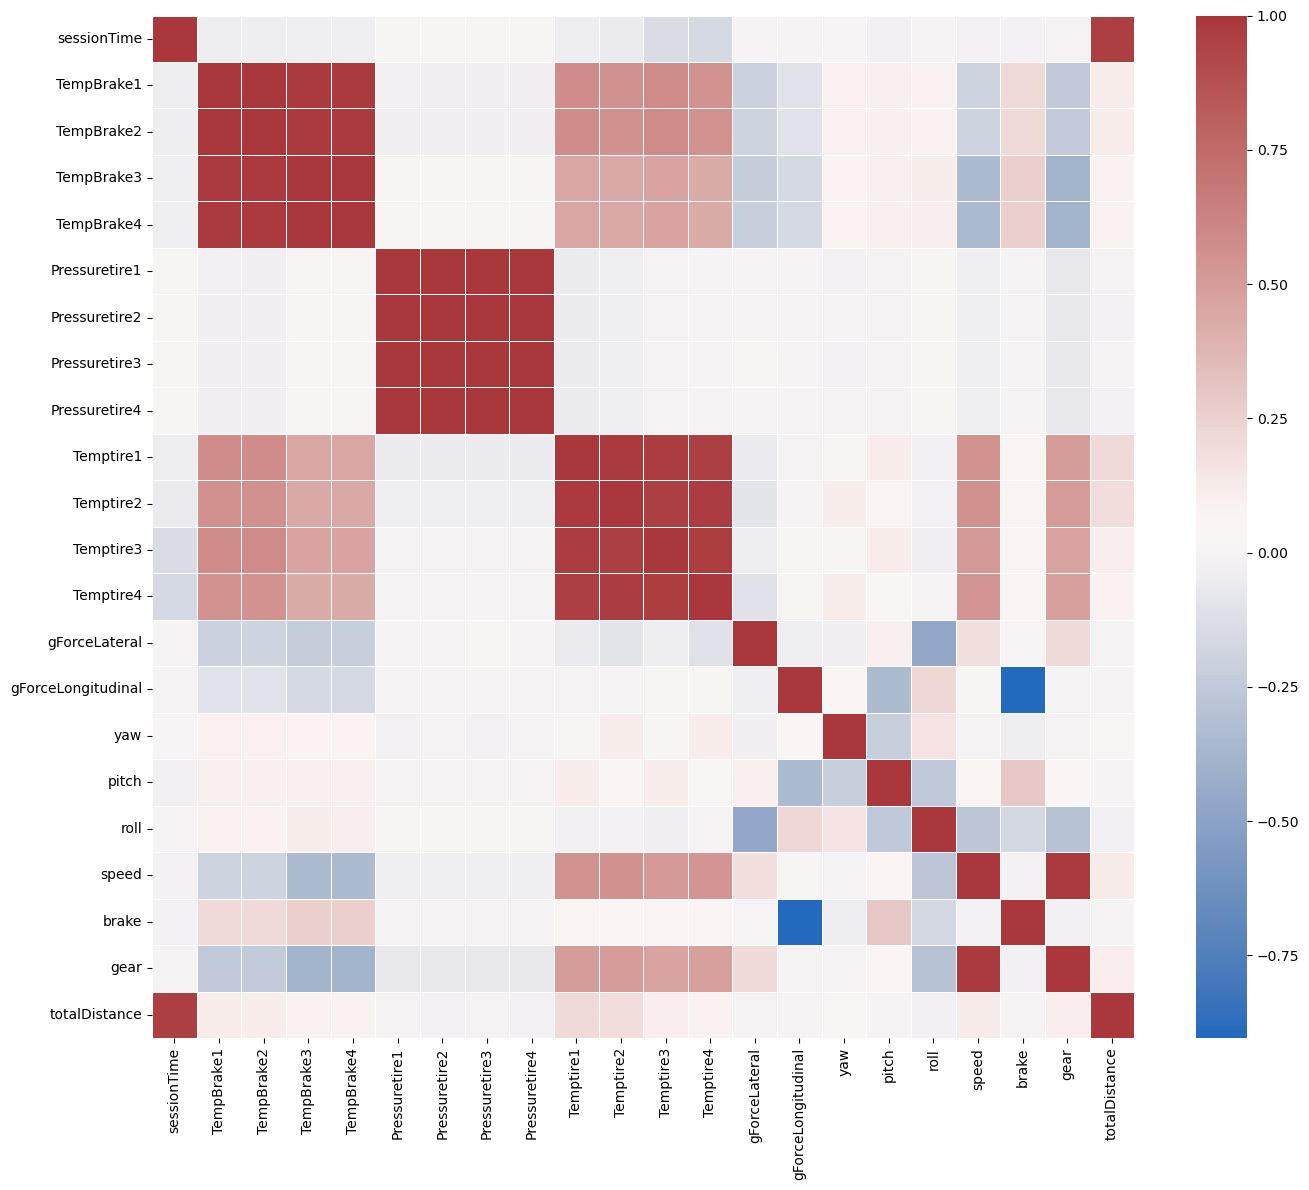

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(tm837[['sessionTime','TempBrake1', 'TempBrake2',  'TempBrake3', 'TempBrake4','Pressuretire1', 'Pressuretire2',  'Pressuretire3', 'Pressuretire4','Temptire1', 'Temptire2',  
       'Temptire3', 'Temptire4','gForceLateral', 'gForceLongitudinal','yaw', 'pitch', 'roll', 'speed',
       'brake', 'gear','totalDistance']].corr(), cmap="vlag",linewidths=.5)

In [ ]:
### The inconsistency does not exist in the second race dataset.  Lets look at the track data for each one

print(sd145)
print(sd837)

   weather  trackTemperature  airTemperature  totalLaps  trackLength   trackId
0        0                29              20         35         4371  Montreal
   weather  trackTemperature  airTemperature  totalLaps  trackLength  \
0        0                30              21         36         4323   

        trackId  
0  RedBull Ring  


In [ ]:
## Without digging into the physics of the problem, Montreal has no extreme left turns, but RedBull does.  This might lead to the front right irregularity in all cars on the Montreal track.